In [1]:
import numpy as np


In [2]:
#Here is a function that we will later try to approximate by a polynomial
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


In [3]:
#Create test and training samples of the function
np.random.seed(0)

n_samples = 30

#this is a list of random real numbers
X = np.sort(np.random.rand(n_samples))

#this is the list of values of our function at these numbers, disturbed by some random noise
#(if we apply the function to a list, we get back a list of values,
# this we add to a list of disturbance values)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

print(X)
print(y)


[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


In [4]:
#--------randomly splits your sample data into a training set and a test set-----------
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
#---- it doesn't matter how exactly this splitting is done; what matters is that now
# xtrain and ytrain are lists of numbers of the same length
#which you should use as training data.


In [5]:
#-----your task: -----------

# First approximate the given training set xtrain, ytrain by polynomials p_1, ..., p_30
# of degrees 1 to 30.

# Polynomials in numpy can be realized as poly1d objects:
# https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

# It is up to you how you do it - either using a linear model as in part a), or a pseudoinverse as in part b)
# or by means of existing methods in Python e.g. numpy.polyfit():
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# or methods you find here:
# https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial

# Let's try the easiest pseudoinverse.

my_poly = [] # <--- your list of polynomials here!

# constant column
data = X.reshape(-1,1)**0

for i in range(30):
    data = np.concatenate((X.reshape(-1,1)**(i+1),data), axis = 1)
    my_poly.append(np.poly1d(np.linalg.pinv(data)@y))


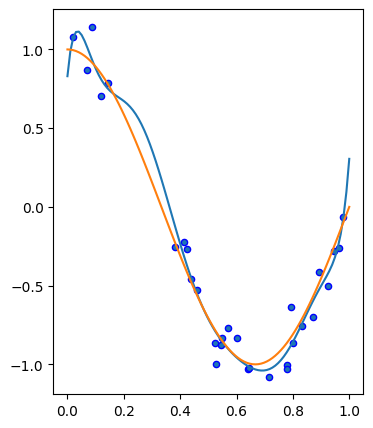

In [6]:
#Here you can watch your approximation (blue), the true function (orange)
#and the test points (blue circles)
import matplotlib.pyplot as plt
X_test = np.linspace(0, 1, 100)  # <-- set of points to plot, we go in 100 steps from 0 to 1
plt.figure(figsize=(4, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X_test, my_poly[8](X_test), label="Model") # <--- plotting the 9th polynomial in our list
plt.plot(X_test, true_fun(X_test), label="True function")
# this is just for having something to look at, and for you seeing how to plot.


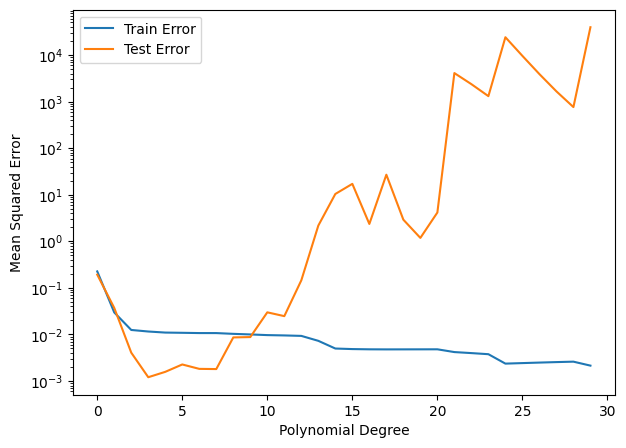

The mean squared error on the test set is lowest for degree 3


In [8]:
#-----back to your task: -----------
# Calculate and print for each of the polynomials on your list the mean squared error on the training set
# and on the test set, i.e.
#the sum over all j of (p_i(xtrain[j])-ytrain[j])^2.
# You can do this either by hand or using sklearn.metrics.mean_squared_error,
#or if you used np.polyfit above, you can activate the option 'full' and obtain part of the the data right away (I think)

m_train = []# <--- list of mean squared errors on the training set here (should be a list of numbers, going through all the polynomials)
#Also calculate and print the mean squared error of each of the polynomials on your test set xtest, ytest.
m_test = []# <--- mean squared error on the test set here (should be a list of numbers, going through all the polynomials)

for i in range(len(my_poly)):
    m_train.append(np.mean((my_poly[i](X)-y)**2))
    m_test.append(np.mean((my_poly[i](X_test)-true_fun(X_test))**2))

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(m_train, label ='Train Error')
plt.plot(m_test, label = 'Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
ax.set_yscale('log')
plt.show()


# the mean squared error of the training set should always go down with rising degree.
# the mean squared error of the test set should go down first, but then might go up again - that's
# when you start overfitting!

#-----final task: write a function that takes the above data and prints------------
print('The mean squared error on the test set is lowest for degree {}'.format(m_test.index(min(m_test))))
